In [82]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [164]:
# intercept, calories, cholesterol (1=low,2=moderate,3=high), exercise (1=sedentary,2=moderate,3=active)
X = np.array([
        [1, 4500, 3, 1],
        [1,   10, 1, 3],
        [1, 1926, 3, 2],
        [1,  100, 1, 2],
        [1, 1202, 2, 3],
    ])

# intercept, calories, 
# cholesterol_low, cholesterol_moderate, cholesterol_high
# exercise_sedentary, exercise_moderate, exercise_active
X_one_hot = np.array([
        [1, 4500, 0, 0, 1, 1, 0, 0],
        [1,    0, 1, 0, 0, 0, 0, 1],
        [1, 1926, 0, 1, 0, 0, 1, 0],        
        [1,  100, 1, 0, 0, 0, 1, 0],
        [1, 1202, 0, 2, 0, 0, 0, 1],
    ])

# weight
y = np.array([
        314,
        120,
        200,
        140,
        190,
    ])

In [165]:
beta = np.array([0,0,0,0])

In [190]:
-2*(y - X.dot(beta)).dot(X)

array([ -6.84478480e+02,   1.85370095e+00,  -8.62228297e+02,
        -1.88910685e+03])

In [167]:
def gradient(X,y,beta):
    y_hat = X.dot(beta)    
    return -2 * (y - y_hat).dot(X)

In [168]:
T = 500
gamma = 1e-8

beta = np.array([0.0,0.0,0.0,0.0])
errors = []

for t in range(T):
    error = (y - X.dot(beta)).mean()
    errors.append(error)
    print('T', t, 'beta', beta)
    beta -= gamma * gradient(X, y, beta)

T 0 beta [ 0.  0.  0.  0.]
T 1 beta [  1.92800000e-05   4.08356000e-02   4.36400000e-05   3.84800000e-05]
T 2 beta [  3.22402634e-05   6.09149395e-02   6.94821719e-05   6.70058717e-05]
T 3 beta [  4.20930355e-05   7.07881795e-02   8.65729381e-05   9.06371749e-05]
T 4 beta [  5.04178154e-05   7.56429593e-02   9.93605317e-05   1.11861755e-04]
T 5 beta [  5.79912615e-05   7.80301027e-02   1.10032202e-04   1.31902916e-04]
T 6 beta [  6.51952660e-05   7.92038800e-02   1.19663445e-04   1.51362171e-04]
T 7 beta [  7.22176098e-05   7.97810308e-02   1.28783095e-04   1.70535289e-04]
T 8 beta [  7.91506269e-05   8.00648132e-02   1.37651186e-04   1.89567705e-04]
T 9 beta [  8.60397193e-05   8.02043430e-02   1.46395580e-04   2.08530932e-04]
T 10 beta [  9.29072114e-05   8.02729420e-02   1.55079148e-04   2.27460131e-04]
T 11 beta [  9.97640806e-05   8.03066636e-02   1.63732805e-04   2.46372593e-04]
T 12 beta [ 0.00010662  0.08032324  0.00017237  0.00026528]
T 13 beta [ 0.00011346  0.08033137  0.0001

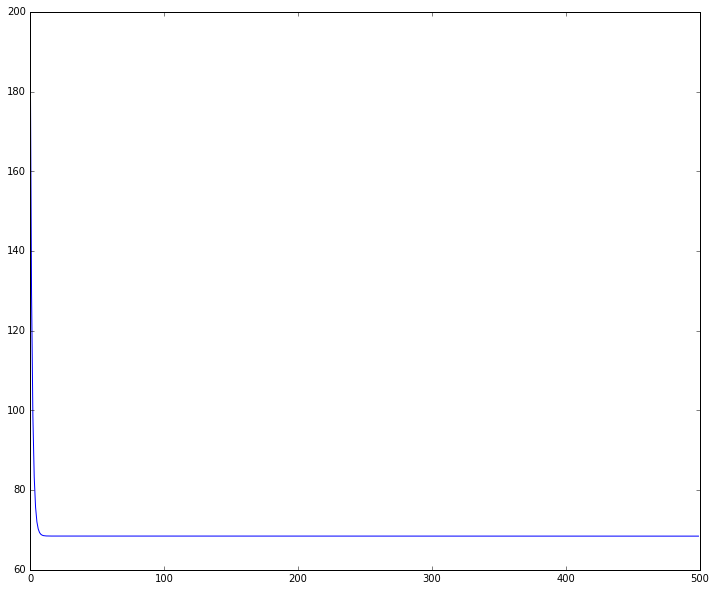

In [169]:
plt.plot(range(T), errors);

In [170]:
beta

array([ 0.00344732,  0.08033024,  0.00438065,  0.0094854 ])

In [171]:
list(X.dot(beta))

[361.51214324459824,
 0.83958653153888629,
 154.75159741821275,
 8.0598225076409378,
 96.597610238124744]

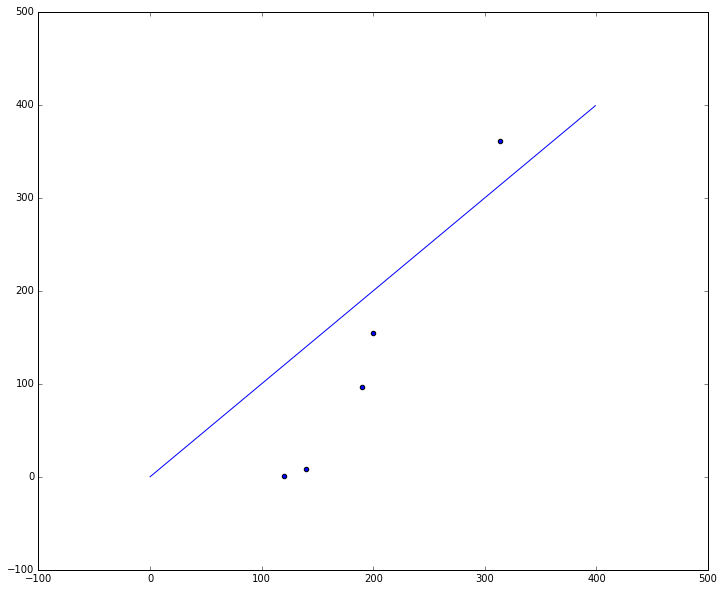

In [177]:
plt.scatter(y, X.dot(beta))
plt.plot(range(400), range(400))

In [173]:
new_X = np.array([
    [1, 1200, 2, 0]
])

new_X.dot(beta)

array([ 96.40849358])

In [174]:
T = 500
gamma = 1e-8

beta_one_hot = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
errors_one_hot = []

for t in range(T):
    error = (y - X_one_hot.dot(beta_one_hot)).mean()
    errors_one_hot.append(error)
    print('T', t, 'beta', beta_one_hot)
    beta_one_hot -= gamma * gradient(X_one_hot, y, beta_one_hot)

T 0 beta [ 0.  0.  0.  0.  0.  0.  0.  0.]
T 1 beta [  1.92800000e-05   4.08116000e-02   5.20000000e-06   1.16000000e-05
   6.28000000e-06   6.28000000e-06   6.80000000e-06   6.20000000e-06]
T 2 beta [  3.22521555e-05   6.08792459e-02   1.03183756e-05   1.96657127e-05
   8.88695536e-06   8.88695536e-06   1.19463126e-05   1.14188875e-05]
T 3 beta [  4.21226532e-05   7.07467928e-02   1.53966149e-05   2.59935655e-05
   9.68782224e-06   9.68782224e-06   1.62794832e-05   1.61553477e-05]
T 4 beta [  5.04680208e-05   7.55988052e-02   2.04551184e-05   3.14668871e-05
   9.60060966e-06   9.60060966e-06   2.02128200e-05   2.06545912e-05]
T 5 beta [  5.80634597e-05   7.79846075e-02   2.55039171e-05   3.65200232e-05
   9.07671580e-06   9.07671580e-06   2.39495525e-05   2.50371914e-05]
T 6 beta [  6.52901474e-05   7.91577391e-02   3.05479436e-05   4.13665475e-05
   8.33809959e-06   8.33809959e-06   2.75896117e-05   2.93624361e-05]
T 7 beta [  7.23355144e-05   7.97345831e-02   3.55896231e-05   4.6111

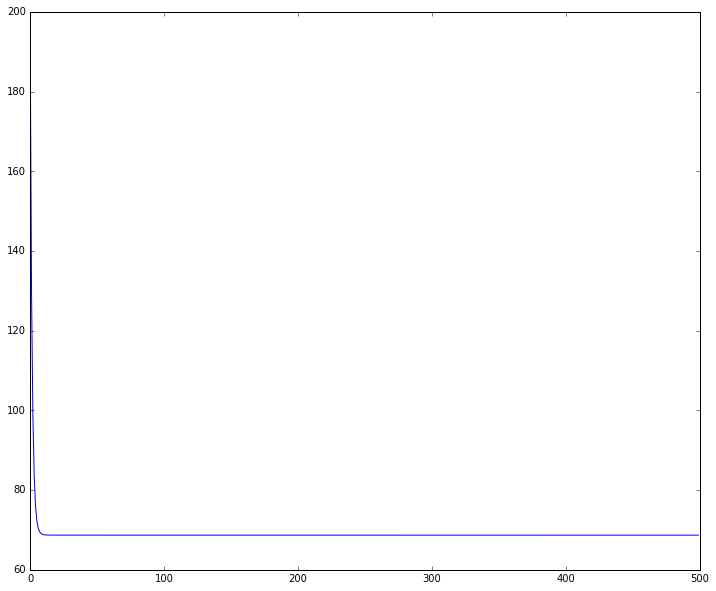

In [175]:
plt.plot(range(T), errors_one_hot);

In [136]:
beta_one_hot

array([ 0.00153728,  0.07505131,  0.00119998,  0.00056053, -0.00022323,
       -0.00022323,  0.00056053,  0.00119998])

In [176]:
list(X_one_hot.dot(beta_one_hot))

[361.31258097764118,
 0.0081178180933621467,
 154.64827272001071,
 8.0368708218340164,
 96.520197797294628]

In [184]:
beta_ls, resid, rank, s = np.linalg.lstsq(X, y)

In [186]:
list(beta_ls)

[129.47676714160457,
 0.044032158707880999,
 -4.896681530818376,
 2.2601941380158803]

In [187]:
X.dot(beta_ls)

array([ 315.19163087,  131.80098961,  204.1130485 ,  133.50368976,
        179.39064126])